# Imports

In [ ]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_text
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# The Data

## A Labeled Data Set

In [263]:
N = 500

xgauss1 = [rd.gauss(np.random.randint(-1,3), np.random.randint(-1,3)) for _ in range(N)]
xgauss2 = [rd.gauss(np.random.randint(-2,2), np.random.randint(-2,2)) for _ in range(N)]

In [264]:
print(xgauss1)

[-1.1904679564886456, 0.0, 1.635209471974206, -1.0, 1.1097390718601603, 1.0, -1.0, 0.0, 1.7270355880388326, 2.197301394041248, -0.20621473172812416, -1.0, 0.8324843960670909, 0.07138942910107726, 0.0, -0.7865526689947772, -1.2274840013287296, 0.08959845438931024, -2.342740139561653, 0.7960152683937903, 0.9018545445513271, -0.20023051980082893, -0.7009696542632762, 1.0, 0.9754443220539968, 1.8128813509714004, 0.07433080342700445, 1.2484124936976806, 0.5987250845156458, 1.2681660175634808, 0.0, 0.15847159738656721, 1.8222031076924137, 1.0, 2.453892662437558, 0.0, 1.2500201331743817, -0.9497574926507175, 0.5817053428717824, -1.771517286912756, -1.0, 2.0, 0.5664671509601207, 1.0, 3.2816316804962136, 2.323761031469843, 2.24006052878614, -1.072737677944717, -0.7015089297890269, 1.4441875898403242, -1.2753726241026344, 1.0, 2.5476812679273904, -0.3531736160431457, 0.0, 1.0, 2.318015553144889, -0.317341625951183, 3.05671610225785, 0.30537910984126226, -0.42110993718740786, 2.383062247641375, -

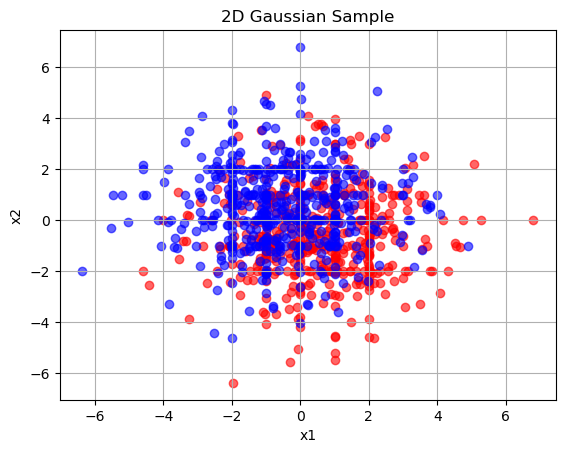

In [265]:
plt.scatter(xgauss1, xgauss2, alpha=0.6, color='red')
plt.scatter(xgauss2, xgauss1, alpha=0.6, color="blue")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D Gaussian Sample')
plt.grid(True)
plt.show()

In [266]:
x1_min, x1_max= min(xgauss1), max(xgauss1)
x2_min, x2_max= min(xgauss2), max(xgauss2)
Neval=15; h1= (x1_max-x1_min)/Neval; h2=(x2_max-x2_min)/Neval
x1Eval, x2Eval= np.meshgrid(np.arange(x1_min, x1_max, h1), np.arange(x2_min, x2_max, h2))
grid_points = np.c_[x1Eval.ravel(), x2Eval.ravel()]

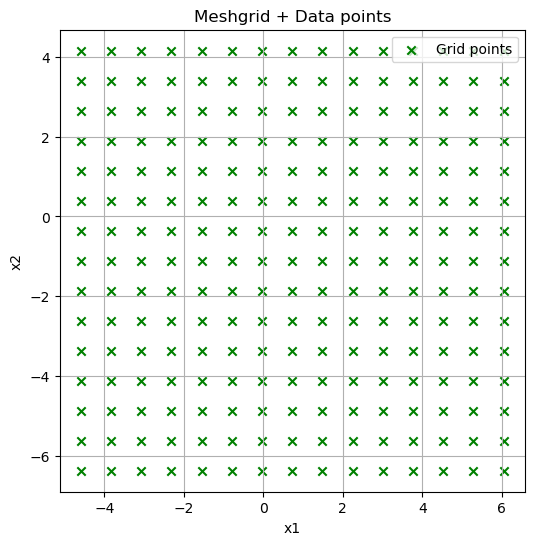

In [267]:
plt.figure(figsize=(6,6))
plt.scatter(x1Eval, x2Eval, color='green', marker='x', label='Grid points')
# plt.scatter(xgauss1, xgauss2, color='red', alpha=0.6, label='Group I (Y=1)')
# plt.scatter(xgauss2, xgauss1, color='blue', alpha=0.6, label='Group II (Y=0)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Meshgrid + Data points')
plt.legend()
plt.grid(True)
plt.show()

## Classification Decision Tree

In [268]:
df = pd.read_csv("SAheart.txt", index_col=0)

In [269]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [270]:
df.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

In [271]:
df.shape

(462, 10)

In [272]:
df['famhist']

row.names
1      Present
2       Absent
3      Present
4      Present
5      Present
        ...   
459     Absent
460     Absent
461     Absent
462     Absent
463    Present
Name: famhist, Length: 462, dtype: object

In [273]:
df = pd.get_dummies(df,columns=["famhist"],drop_first=True )

In [274]:
df.dtypes

sbp                  int64
tobacco            float64
ldl                float64
adiposity          float64
typea                int64
obesity            float64
alcohol            float64
age                  int64
chd                  int64
famhist_Present       bool
dtype: object

In [275]:
X = df.drop("chd", axis=1)
y = df["chd"]

In [276]:
print(y)

row.names
1      1
2      1
3      0
4      1
5      1
      ..
459    0
460    1
461    0
462    0
463    1
Name: chd, Length: 462, dtype: int64


In [277]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
treefit = model.fit(X_train, y_train)
pY_train = treefit.predict_proba(X_train)

predx_classes = np.argmax(pY_train, axis=1)

In [278]:
E_train = (y_train != predx_classes).sum()/y_train.size

print('Error on the complete training set :', E_train)

Error on the complete training set : 0.0


## Model Description

In [279]:
r = export_text(treefit)
print(r)

|--- feature_7 <= 49.50
|   |--- feature_7 <= 30.50
|   |   |--- feature_5 <= 19.53
|   |   |   |--- feature_3 <= 11.26
|   |   |   |   |--- feature_5 <= 18.90
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  18.90
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  11.26
|   |   |   |   |--- class: 1
|   |   |--- feature_5 >  19.53
|   |   |   |--- feature_0 <= 107.00
|   |   |   |   |--- feature_7 <= 19.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  19.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  107.00
|   |   |   |   |--- feature_2 <= 10.06
|   |   |   |   |   |--- feature_6 <= 44.54
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  44.54
|   |   |   |   |   |   |--- feature_6 <= 48.39
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_6 >  48.39
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  10.06
|   |   |   |   |   |--- c

## Score and decision boundaries

In [280]:
feature_idx = [0, 1]
X_plot = X_train.iloc[:,feature_idx].values

In [281]:
tree2d = DecisionTreeClassifier()
tree2d.fit(X_plot, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [282]:
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

Z = tree2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

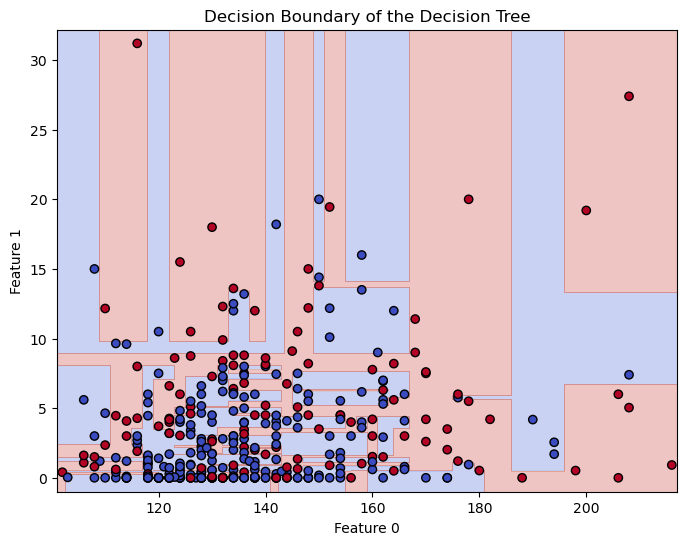

In [283]:
plt.figure(figsize=(8,6))

# Plot the decision regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot the training points
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)

plt.xlabel(f'Feature {feature_idx[0]}')
plt.ylabel(f'Feature {feature_idx[1]}')
plt.title('Decision Boundary of the Decision Tree')
plt.show()

## Meta parameters : split, leaf and deviance

In [284]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [285]:
model2 = DecisionTreeClassifier(min_samples_split=20,min_samples_leaf=10)

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

treefit = model2.fit(X_plot, y_train)
pY_train = treefit.predict_proba(X_plot)

predx_classes = np.argmax(pY_train, axis=1)

x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

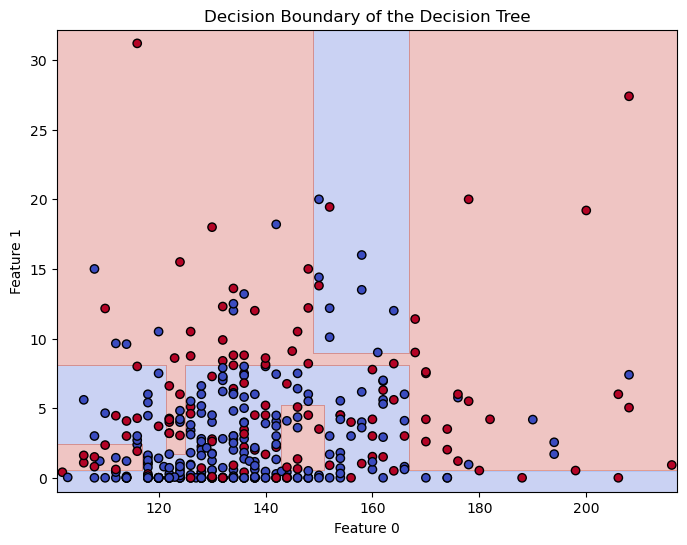

In [287]:
plt.figure(figsize=(8,6))

# Plot the decision regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot the training points
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)

plt.xlabel(f'Feature {feature_idx[0]}')
plt.ylabel(f'Feature {feature_idx[1]}')
plt.title('Decision Boundary of the Decision Tree')
plt.show()

The deviance parameter is the parameter taking into account to split while constructing the decision tree. By default it's "gini" here. To modify it we could set it to another value for example : "Entropy"

# Bagging

## Model Calibration

In [288]:
treemod = DecisionTreeClassifier()
bagmod = BaggingClassifier(estimator=treemod, n_estimators=10, random_state=0)
treemodfit = treemod.fit(X_train, y_train)
bagmodfit = bagmod.fit(X_train,y_train)

In [289]:
pY_train = bagmodfit.predict_proba(X_train)

predx_classes = np.argmax(pY_train, axis=1)
print(predx_classes)

[0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1
 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1
 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0]


## Score and decision boundaries

In [290]:
feature_idx = [0, 1]
X_plot = X_train.iloc[:,feature_idx].values

treemod2d = DecisionTreeClassifier()
bagmod2d = BaggingClassifier(estimator=treemod2d, n_estimators=10, random_state=0)
treemodfit = treemod2d.fit(X_plot, y_train)
bagmodfit2d = bagmod2d.fit(X_plot,y_train)

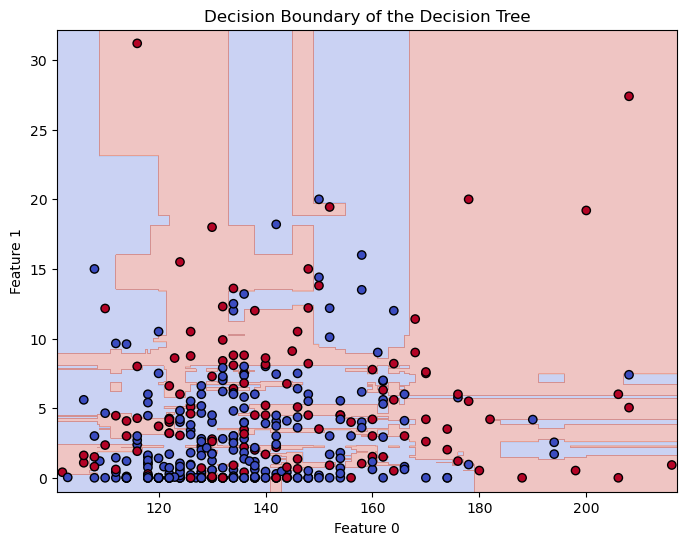

In [291]:
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

Z = bagmod2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))

# Plot the decision regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot the training points
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)

plt.xlabel(f'Feature {feature_idx[0]}')
plt.ylabel(f'Feature {feature_idx[1]}')
plt.title('Decision Boundary of the Decision Tree')
plt.show()

## Meta Parameters

In [292]:
bagmod.get_params()

{'bootstrap': True,
 'bootstrap_features': False,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [293]:
feature_idx = [0, 1]
X_plot = X_train.iloc[:,feature_idx].values

treemod2d = DecisionTreeClassifier()
bagmod2d = BaggingClassifier(estimator=treemod2d, n_estimators=10, random_state=42,n_jobs=-1, warm_start=True)
treemodfit = treemod2d.fit(X_plot, y_train)
bagmodfit2d = bagmod2d.fit(X_plot,y_train)

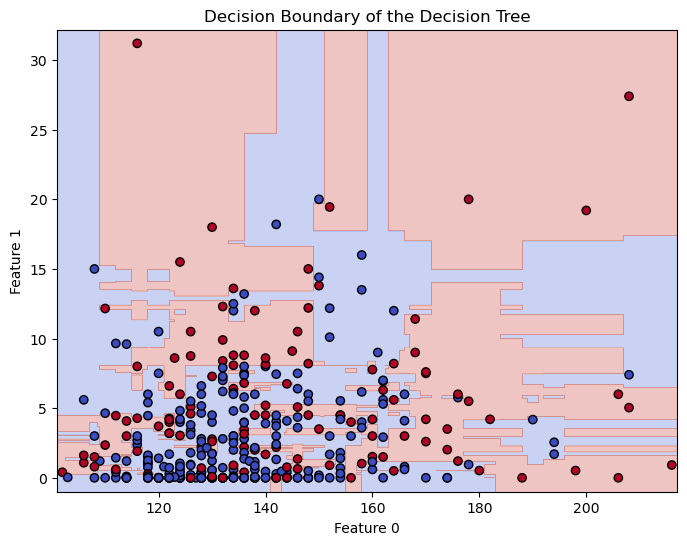

In [294]:
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

Z = bagmod2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))

# Plot the decision regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot the training points
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)

plt.xlabel(f'Feature {feature_idx[0]}')
plt.ylabel(f'Feature {feature_idx[1]}')
plt.title('Decision Boundary of the Decision Tree')
plt.show()

## Model Calibration

In [295]:
RF = RandomForestClassifier(max_depth=2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

RF = RandomForestClassifier()
RFfit = RF.fit(X_train,y_train)

pY_train = RFfit.predict_proba(X_train)

predxclass=np.argmax(pY_train,axis=1)

In [296]:
feature_idx = [0, 1]
X_plot = X_train.iloc[:,feature_idx].values

RF2D = RandomForestClassifier()
RFfit = RF2D.fit(X_plot, y_train)

pY_train = RFfit.predict_proba(X_plot)

predx_classes = np.argmax(pY_train, axis=1)

x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

Z = RF2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

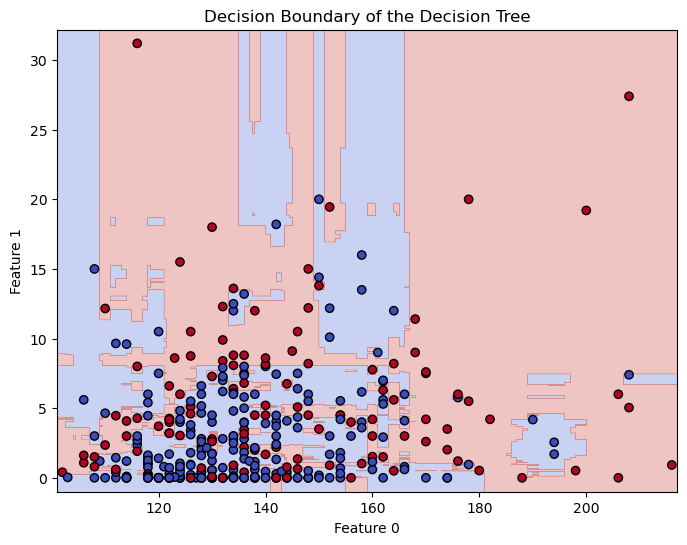

In [297]:
plt.figure(figsize=(8,6))

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)

plt.xlabel(f'Feature {feature_idx[0]}')
plt.ylabel(f'Feature {feature_idx[1]}')
plt.title('Decision Boundary of the Decision Tree')
plt.show()

## Meta Parameters

In [298]:
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

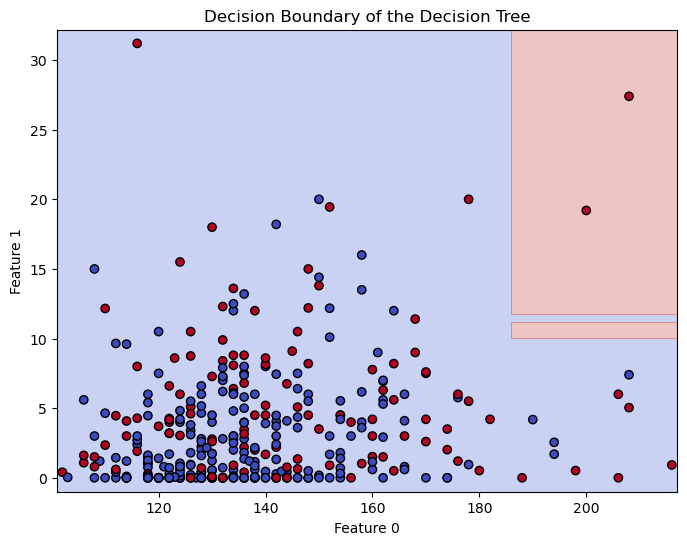

In [301]:
feature_idx = [0, 1]
X_plot = X_train.iloc[:,feature_idx].values

RF2D = RandomForestClassifier(criterion="entropy", max_samples=5, min_samples_leaf=1)
RFfit = RF2D.fit(X_plot, y_train)

pY_train = RFfit.predict_proba(X_plot)

predx_classes = np.argmax(pY_train, axis=1)

x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

Z = RF2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)

plt.xlabel(f'Feature {feature_idx[0]}')
plt.ylabel(f'Feature {feature_idx[1]}')
plt.title('Decision Boundary of the Decision Tree')
plt.show()